# **Suicídios no Brasil**

### Esse é um estudo do dataset intitulado "Suicide Rates Overview 1985 to 2016", que pode ser encontrado nesse [link](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016). Separei apenas os casos ocorridos no Brasil e realizei algumas análises através do sexo, idade e geração para obter informação de quais grupos cometeram mais suicídios entre 1985 e 2015 (o Brasil não possui registros de 2016).

#### **Carregando e lendo os dados**

In [19]:
# Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_suicidios_mundo = pd.read_csv('suicides.csv')
df_suicidios_mundo.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


#### **Comparação de suicídios no Brasil e no mundo.**

In [3]:
#Armazenando apenas os suicídios ocorridos no Brasil em um dataset
df_suicidios_brasil = df_suicidios_mundo[df_suicidios_mundo['country'] == 'Brazil'].sort_values(by='year', 
                                                                                                ascending = False)
df_suicidios_brasil.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4543,Brazil,2015,female,5-14 years,56,15430579,0.36,Brazil2015,NaN,"1,802,214,373,741",9431,Generation Z
4537,Brazil,2015,female,35-54 years,910,28461855,3.20,Brazil2015,NaN,"1,802,214,373,741",9431,Generation X
4532,Brazil,2015,male,75+ years,470,2448560,19.19,Brazil2015,NaN,"1,802,214,373,741",9431,Silent
4533,Brazil,2015,male,55-74 years,1693,12987357,13.04,Brazil2015,NaN,"1,802,214,373,741",9431,Boomers
4534,Brazil,2015,male,35-54 years,3238,26989063,12.00,Brazil2015,NaN,"1,802,214,373,741",9431,Generation X


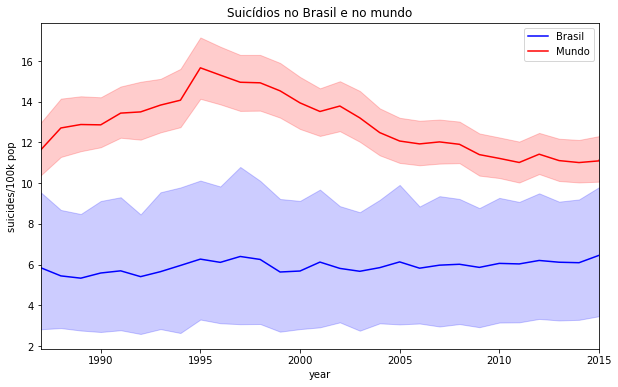

In [4]:
plt.figure(figsize=[10, 6])

sns.lineplot(x=df_suicidios_brasil['year'], y=df_suicidios_brasil['suicides/100k pop'], color='b', label='Brasil')
sns.lineplot(x=df_suicidios_mundo['year'], y=df_suicidios_mundo['suicides/100k pop'], color='r', label='Mundo')

plt.title('Suicídios no Brasil e no mundo')
plt.xlim(1987, 2015)
plt.show()

Podemos notar que a taxa de suicídios no mundo começou a baixar a partir do ano de 1995, enquanto no Brasil se manteve instável.

#### **Taxa de suicídios por sexo.**

In [12]:
# Agrupando os suicídios por sexo e depois somando os valores
suicidios_por_sexo = df_suicidios_brasil.groupby('sex')['suicides_no'].sum()
suicidios_por_sexo

sex
female     49015
male      177598
Name: suicides_no, dtype: int64

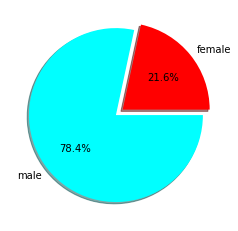

In [13]:
cores = ['red', 'cyan']
plt.pie(suicidios_por_sexo, labels=suicidios_por_sexo.index, autopct='%.1f%%', shadow=True, colors=cores,
        explode=[0.1, 0])
plt.show()

A de suicídios entre homens é quase 4x maior que em mulheres.

#### **Suicídios por idade.**

In [14]:
# Agrupando os suicídios por intervalos de idade e depois somando os valores.
cores_barh = ['y', 'm', 'b', 'c', 'g', 'r']
idade = df_suicidios_brasil.groupby('age')['suicides_no'].sum().sort_values()
idade

age
5-14 years      3029
75+ years       9037
55-74 years    37556
15-24 years    44597
25-34 years    52534
35-54 years    79860
Name: suicides_no, dtype: int64

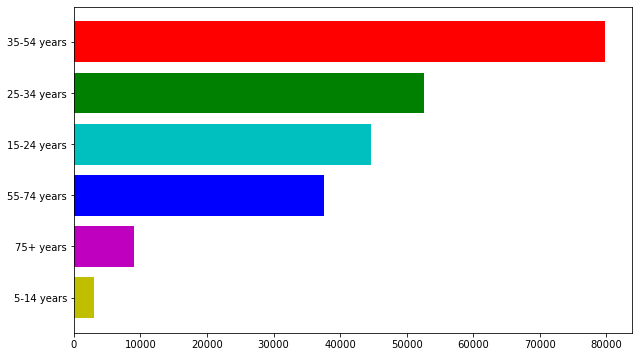

In [15]:
plt.figure(figsize=[10, 6])

x = idade.index
y = idade.values

plt.barh(x, y, color=cores_barh)

plt.show()

Meu palpite estava certo, de que grande parte do números de suicídios no Brasil ocorre entre 25 e 54 anos.

#### **Suicídios por geração.**

In [17]:
# Agrupando os suicídios por geração e depois somando os valores
cores_bar = ['y', 'm', 'b', 'c', 'g', 'r']
geracao = df_suicidios_brasil.groupby('generation')['suicides_no'].sum().sort_values()
geracao

generation
Generation Z        1073
G.I. Generation     7811
Silent             37641
Millenials         38753
Boomers            70364
Generation X       70971
Name: suicides_no, dtype: int64

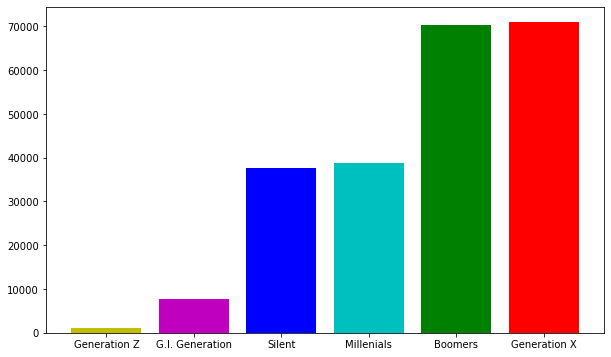

In [18]:
plt.figure(figsize=[10, 6])

x = geracao.index
y = geracao.values

plt.bar(x, y,
       color=cores_bar)

plt.show()

Os _Boomers_ (1946 - 1964) e a _Generation X_ (1961 - 1981) Possuem o maior número de suicídios. É interessante notar que os _Millenuals_(1981 - 1996) constituida de pessoas jovens também possui um grande número de suicídios.